# Stock Price Prediction using Machine Learning Algorithm LSTM

In [40]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#            to predict the closing stock price of TESLA using the past 60 day stock price.

In [60]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [42]:
plt.style.use('fivethirtyeight')

In [62]:
# Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2020-12-24')
# show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001
...,...,...,...,...,...,...
2020-12-18,695.000000,628.539978,668.900024,695.000000,222126200.0,695.000000
2020-12-21,668.500000,646.070007,666.239990,649.859985,58045300.0,649.859985
2020-12-22,649.880005,614.229980,648.000000,640.340027,51716000.0,640.340027


In [63]:
#Get the number of rows and columns
df.shape

(1507, 6)

Text(0, 0.5, 'Close Price (USD)')

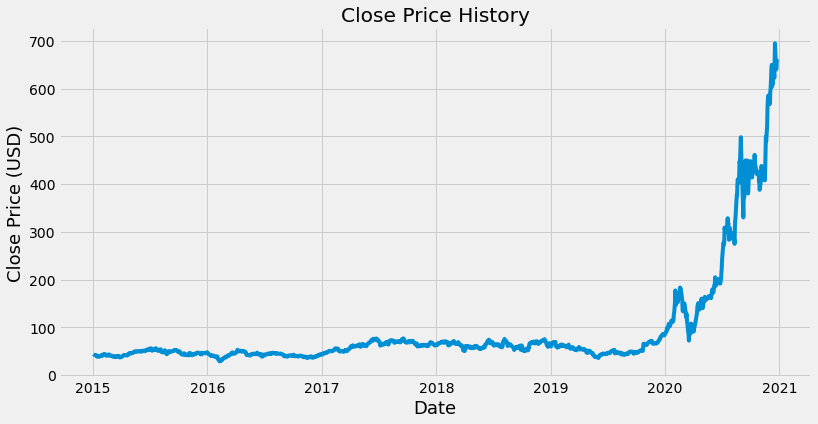

In [64]:
#visualize the closing price history
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

In [65]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1206

In [66]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02270565],
       [0.01993799],
       [0.0202952 ],
       ...,
       [0.91796073],
       [0.92642575],
       [0.95012505]])

In [67]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(X_train)
        print(y_train)
        print()

[array([0.02270565, 0.01993799, 0.0202952 , 0.02019614, 0.02009708,
       0.01890837, 0.01757256, 0.01818493, 0.01471484, 0.0144687 ,
       0.01482891, 0.01448671, 0.01587954, 0.01739546, 0.0172964 ,
       0.01887535, 0.01870424, 0.01672005, 0.0184701 , 0.01798981,
       0.02019314, 0.02242048, 0.02247751, 0.02320995, 0.0221203 ,
       0.02215631, 0.0217991 , 0.02075147, 0.01777368, 0.01804085,
       0.01821495, 0.01824797, 0.02042427, 0.02204525, 0.01911249,
       0.0181429 , 0.01803784, 0.01906746, 0.01791176, 0.01610768,
       0.01677708, 0.0176416 , 0.01709828, 0.01507206, 0.01417152,
       0.01400342, 0.01503004, 0.01422855, 0.01351112, 0.01561839,
       0.01532721, 0.01712229, 0.01560338, 0.01633282, 0.01679809,
       0.01742548, 0.01519814, 0.01403043, 0.01240646, 0.01407846])]
[0.013538139954597857]



In [68]:
#Convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [69]:
#Reshape the dataX_train.shape
X_train.shape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1146, 60, 1)

In [70]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [71]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(optimizer='sgd', loss='mean_squared_error')
#sgd - stochastic gradient descent
# Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

In [72]:
#Train the model
model.fit(X_train, y_train, batch_size = 1, epochs = 3)
# One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
# Total number of training examples present in a single batch.
# We can’t pass the entire dataset into the neural net at once. So, we divide dataset into Number of Batches or sets or parts.


Epoch 1/3
1146/1146 [==============================] - 17s 15ms/step - loss: 4.8946e-05
Epoch 2/3
1146/1146 [==============================] - 17s 15ms/step - loss: 2.5000e-05
Epoch 3/3
1146/1146 [==============================] - 17s 15ms/step - loss: 1.9607e-05


In [73]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])    

In [74]:
#Convert the data to a numpy array
X_test = np.array(X_test)


In [75]:
#Reshaoe the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [76]:
#Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [77]:
#Evaluate the model using root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9524962212952268

<ipython-input-78-6c6e0146b69c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


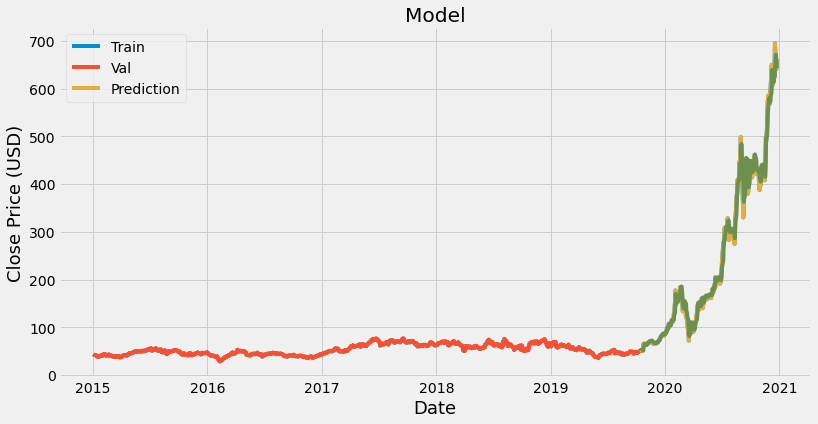

In [78]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'])